In [244]:
import pandas as pd
import numpy as np

from scipy.io import loadmat # mat数据读取
from scipy import optimize

import seaborn as sns 
import matplotlib.pyplot as plt

# 数据载入

In [287]:
# 数据加载
data = loadmat('ex3data1.mat')

X = data['X']
y = data['y'] # 为列向量
y = y.T[0] # 转为行向量

# 查看数据
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

#  Visualizing the data

In [291]:
def displayData(X:np.array,example_width=None):

    rand_indices = np.random.choice(X.shape[0],size=100)
    sel = X[rand_indices,:]

    fig,ax = plt.subplots(10,10,sharey=True, sharex=True)

    for i in range(10):
        for j in range(10):

            ax[i,j].matshow(sel[10 * i + j].reshape((20,20)),cmap='binary')

            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])

    plt.subplots_adjust(wspace=0, hspace=0)

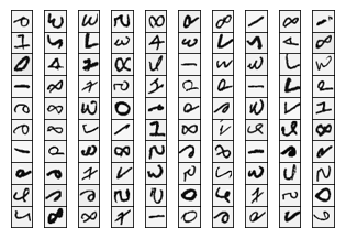

In [160]:
displayData(X)

# Multi-class Classification

## Vectorizing Logistic Regression

In [292]:
def sigmoid(z:np.array)->np.array:

    return 1 / (1 + np.exp(- z))

def lrCostFunction_J(theta:np.array,X:np.array,y:np.array,lambda_:float)->float:

    m = len(y)

    h = sigmoid(X @ theta)

    return (1 / m) * (- y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + lambda_ / (2 * m) * (theta[1:].T @ theta[1:])

def lrCostFunction_grad(theta:np.array,X:np.array,y:np.array,lambda_:float)->np.array:

    m = len(y)

    h = sigmoid(X @ theta)
    
    regularized_theta = (lambda_ / m) * theta[1:]
    
    regularized_theta = np.insert(regularized_theta,0,0)
 
    return (1 / m) * (X.T @ (h - y)) + regularized_theta


In [293]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5),(np.arange(1,16).reshape((3,5))/10).T]
y_t = np.array([1,0,1,0,1])
lambda_t = 3

J = lrCostFunction_J(theta_t,X_t,y_t,lambda_t)
grad = lrCostFunction_grad(theta_t,X_t,y_t,lambda_t)
print('\nCost: %s\n'% J)
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(' %s \n'%grad)
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')


Cost: 2.534819396109744

Expected cost: 2.534819

Gradients:

 [ 0.14656137 -0.54855841  0.72472227  1.39800296] 

Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



## One-vs-all Classification

In [352]:
def oneVsall(X:np.array,y:np.array,num_labels:int,lambda_:float)->np.array:

    m, n = X.shape
    all_theta = np.zeros((num_labels,n + 1))

    X = np.c_[np.ones(m),X]

    initial_theta = np.zeros(n + 1)
    
    for i in range(1,num_labels + 1):

        res = optimize.minimize(fun = lrCostFunction_J,
                                            x0=initial_theta,
                                            args=(X,(y == i) * 1 ,lambda_),
                                            method='TNC',
                                            jac=lrCostFunction_grad,
                                            options={'disp':True})

        
        all_theta[i-1,:] = res.x

    return all_theta

In [353]:
# 计算每种分类的theta值
all_theta = oneVsall(X,y,10,0.1)

In [354]:
def predictOneVsall(all_theta:np.array,X:np.array)->np.array:

    m = len(X)

    num_labels = len(all_theta)

    X = np.c_[np.ones(m),X]

    h = sigmoid(X @ all_theta.T)

    return np.argmax(h,axis=1)

In [355]:
pred = predictOneVsall(all_theta,X)

print("Training Set Accuracy:%.4f" % np.mean(((pred + 1) == y) * 100))

Training Set Accuracy:96.4600


# Neural Networks

本次作业仅根据训练好的数据进行预测

In [364]:
data = loadmat('ex3weights.mat')

Theta1 = data['Theta1']
Theta2 = data['Theta2']

print(Theta1.shape,Theta2.shape)

data

(25, 401) (10, 26)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [368]:
def predict(Theta1:np.array,Theta2:np.array,X:np.array)->np.array:

    X = np.c_[np.ones(len(X)),X]

    h1 = sigmoid(X @ Theta1.T)

    h1 = np.c_[np.ones(len(h1)),h1]

    h2 = sigmoid(h1 @ Theta2.T)

    return np.argmax(h2,axis=1)

In [371]:
pred = predict(Theta1,Theta2,X)

print("Training Set Accuracy:%.4f" % np.mean(((pred + 1) == y) * 100))

Training Set Accuracy:97.5200
